# House Prices in Iowa

With 79 explanatory variables describing (almost) every aspect of residential homes in **Ames, Iowa**, this competition challenges you to **predict the final price of each home**.

- https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## 1. Setup

In [76]:
# import standard libraries for linear algebra, handling data and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 2)
pd.set_option('display.max_columns', 100)
#pd.options.display.max_columns = 100

sns.set(style="white", color_codes=True)

%matplotlib inline

## 2. Reading and exploring the data

In [77]:
# read the data into a Pandas DataFrame
train_data = pd.read_csv('house-prices/train.csv')
test_data = pd.read_csv('house-prices/test.csv')

combine = [train_data, test_data]
data = train_data

# show some samples
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
# how many rows and columns are there in the data?
data.shape

(1460, 81)

In [79]:
# which are the names of the columns and their datatypes?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [80]:
# describing numerical features
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [81]:
# describing categorical features
data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [82]:
# which are the columns with null values?
ndfs = []
for dataset in combine:
    rows = len(dataset.index)

    null_columns = dataset.columns[dataset.isnull().any()]
    null_counts = dataset[null_columns].isnull().sum()

    ndf = pd.DataFrame(null_counts, columns=['Count'])
    ndf['Percent'] = ndf['Count'] / rows * 100
    ndfs.append(ndf)

In [83]:
# nulls in the train dataset
ndfs[0].sort_values(by='Percent', ascending=True)

,Count,Percent
Electrical,1,0.07
MasVnrType,8,0.55
MasVnrArea,8,0.55
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtFinType1,37,2.53
BsmtExposure,38,2.60
BsmtFinType2,38,2.60
GarageCond,81,5.55
GarageQual,81,5.55


In [84]:
# nulls in the test dataset
ndfs[1].sort_values(by='Percent', ascending=True)

,Count,Percent
TotalBsmtSF,1,0.07
GarageArea,1,0.07
GarageCars,1,0.07
KitchenQual,1,0.07
BsmtUnfSF,1,0.07
BsmtFinSF2,1,0.07
BsmtFinSF1,1,0.07
SaleType,1,0.07
Exterior1st,1,0.07
Exterior2nd,1,0.07


# 3. Data correction

### 3.1. Handling null values

#### 3.1.1. Use mode value in attributes with low percentage of nulls

In [85]:
# fill nulls with the mode value when less than 5%
for ndf in ndfs:
    for att, row in ndf.query("Percent < 5.0").iterrows():
        mode_value = data[att].dropna().mode()[0]
        print("\nFilling nulls in attribute [%s] with mode value [%s]:" % (att, mode_value))
        for dataset in combine:
            dataset[att] = dataset[att].fillna(mode_value)    
        print(data[att].value_counts())


Filling nulls in attribute [MasVnrType] with mode value [None]:
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

Filling nulls in attribute [MasVnrArea] with mode value [0.0]:
0.0       869
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0    

#### 3.1.2. Fix nulls in attributes concerning garage

In [86]:
# which are the possible values for the categorical attributes?
cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in cols:
    print(data[col].value_counts(), '\n')

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 



In [87]:
# fill nulls with the mode value
for att in cols:
    mode_value = data[att].dropna().mode()[0]
    print("\nFilling nulls in attribute [%s] with mode value [%s]:" % (att, mode_value))
    for dataset in combine:
        dataset[att] = dataset[att].fillna(mode_value)
    print(data[att].value_counts())


Filling nulls in attribute [GarageType] with mode value [Attchd]:
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Filling nulls in attribute [GarageFinish] with mode value [Unf]:
Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

Filling nulls in attribute [GarageQual] with mode value [TA]:
TA    1392
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

Filling nulls in attribute [GarageCond] with mode value [TA]:
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [88]:
# fill missing GarageYrBlt values with YearBuilt
att = 'GarageYrBlt'
for dataset in combine:
    dataset.loc[dataset[att].isnull(), att] = dataset.loc[dataset[att].isnull(), 'YearBuilt']

#### 3.1.3. Handle lot frontage attribute

In [89]:
# select only features concerning lot
lot_data = data[['LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'LandContour']].dropna()
lot_data.head()

,LotFrontage,LotArea,LotShape,LotConfig,LandContour
0,65.0,8450,Reg,Inside,Lvl
1,80.0,9600,Reg,FR2,Lvl
2,68.0,11250,IR1,Inside,Lvl
3,60.0,9550,IR1,Corner,Lvl
4,84.0,14260,IR1,FR2,Lvl


In [90]:
# replace categorical values by numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in ['LotShape', 'LotConfig', 'LandContour']:
    lot_data[col] = label_encoder.fit_transform(lot_data[col])
    
lot_data.head()

,LotFrontage,LotArea,LotShape,LotConfig,LandContour
0,65.0,8450,3,4,3
1,80.0,9600,3,2,3
2,68.0,11250,0,4,3
3,60.0,9550,0,0,3
4,84.0,14260,0,2,3


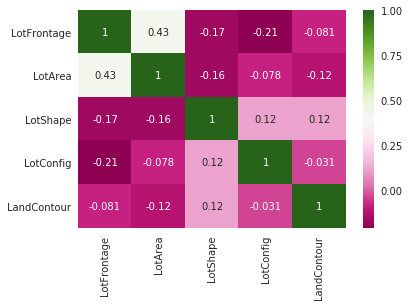

In [91]:
# is there a correlation from lot frontage with lot area?
sns.heatmap(data=lot_data.corr(), annot=True, cmap="PiYG")

In [92]:
# create a simple linear regression to predict LotArea
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()

X = lot_data[['LotArea']] # use only LotArea
#X = lot_data.drop('LotFrontage', axis=1) # use all columns
y = lot_data['LotFrontage']

# train the model
lr.fit(X, y)

# print function parameters
print(lr.coef_, lr.intercept_)

[0.0013058] 57.055042483859495


In [93]:
# show some null samples
data.loc[data.LotFrontage.isnull(), ['LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'LandContour']].head()

,LotFrontage,LotArea,LotShape,LotConfig,LandContour
7,NaN,10382,IR1,Corner,Lvl
12,NaN,12968,IR2,Inside,Lvl
14,NaN,10920,IR1,Corner,Lvl
16,NaN,11241,IR1,CulDSac,Lvl
24,NaN,8246,IR1,Inside,Lvl


In [94]:
# try predicting some values
print(lr.predict([[10382], [12968], [8246]]))

[70.61184543 73.98864108 67.82265923]


In [95]:
# fill missing LotFrontage values with a regression based on LotArea
att = 'LotFrontage'
for dataset in combine:
    dataset.loc[dataset[att].isnull(), att] = lr.predict(dataset.loc[dataset[att].isnull(), ['LotArea']])

In [96]:
# show some resulting sample
data[['LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'LandContour']].head()

,LotFrontage,LotArea,LotShape,LotConfig,LandContour
0,65.0,8450,Reg,Inside,Lvl
1,80.0,9600,Reg,FR2,Lvl
2,68.0,11250,IR1,Inside,Lvl
3,60.0,9550,IR1,Corner,Lvl
4,84.0,14260,IR1,FR2,Lvl


#### 3.1.4. Handle fireplace quality attribute

In [97]:
# which are the most used values?
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [98]:
# show some missing samples
data.loc[data.FireplaceQu.isnull()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
5,6,50,RL,85.00,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
10,11,20,RL,70.00,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,13,20,RL,73.99,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
15,16,45,RM,51.00,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000


In [99]:
# fill null values with 'NA' where there is no fireplace at all
for dataset in combine:
    dataset.loc[dataset.FireplaceQu.isnull() & dataset.Fireplaces == 0, 'FireplaceQu'] = 'NA'

# is there any null left?
data.loc[data.FireplaceQu.isnull()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### 3.1.5. Drop remaining attributes with more than 80% null values

In [100]:
# drop columns with a lot of nulls
cols = ['Fence', 'Alley', 'MiscFeature', 'PoolQC']
for dataset in combine:
    dataset.drop(cols, axis=1, inplace=True)
    
# TODO: check whether maintaining these columns would be effective

#### 3.1.6. Final checking nulls

In [101]:
# is there any column with null values left?
for dataset in combine:
    dataset[dataset.columns[dataset.isnull().any()]].isnull().sum()

In [102]:
# show the resulting data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,NA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,NA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,NA,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,NA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### 3.2. Transformations in the columns values

#### 3.2.1. Separate categorical and numeric columns

In [103]:
# show the attributes names
print(data.columns.values)

# categorical
cat_cols = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
            'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
            'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
            'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
            'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'PavedDrive', 'SaleType', 'SaleCondition'
           ]
#cat_cols = list(data.select_dtypes(include=['object']).columns.values)

# numeric (continuous and discrete)
num_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
            'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
            'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
            'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
            'MiscVal', 'MoSold', 'YrSold'
           ]

# remaining columns
rem_cols = ['Id', 'SalePrice']

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle' 'RoofMatl'
 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea' 'ExterQual'
 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SaleType' 'SaleCondition' 'SalePrice']


#### 3.2.2. Label encoding on categorical columns

In [104]:
# transform categorical string values into ordered numbers
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for dataset in combine:
    for col in cat_cols:
        dataset[col] = labelencoder.fit_transform(dataset[col].astype(str))

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,9,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,4,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,4,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,7,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,0,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,9,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,4,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,0,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,10,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,4,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,0,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,9,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,4,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,0,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


#### 3.2.3. Normalization (scaling) on columns

In [105]:
# how many attributes are in the dataset?
len(data.columns.values)

77

In [106]:
# show only features attributes (i.e., exclude id and target)
pd.DataFrame(data.iloc[:,1:76]).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,9,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,4,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4
1,4,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,7,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,0,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4
2,9,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,4,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,0,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4
3,10,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,4,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,0,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0
4,9,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,4,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,0,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4


In [107]:
# transform SalePrice (the target) using ln()
# FIXME: won't do it
#data['SalePrice'] = np.log(data['SalePrice'])
data['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [108]:
# scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# train the scaler
scaler.fit(data.iloc[:,1:76])

for dataset in combine:
    dataset.iloc[:,1:76] = scaler.transform(dataset.iloc[:,1:76])

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.79,-0.05,-0.24,-0.21,0.06,0.75,0.31,-0.03,0.60,-0.23,-1.21,-0.04,-0.03,-0.41,1.03,7.08e-01,-0.52,1.05,0.88,-0.49,-0.13,0.74,0.75,-1.24,0.51,-0.78,0.36,0.84,-0.32,0.28,0.63,-0.43,0.58,0.31,-0.29,-0.94,-0.46,-0.12,-0.88,0.26,0.3,-0.79,1.16,-0.12,0.37,1.11,-0.24,0.79,1.23,0.16,-0.21,-0.41,0.91,0.26,-0.95,0.0,-0.69,1.01,-0.28,0.31,0.35,0.22,0.19,0.29,-0.75,0.22,-0.36,-0.12,-0.27,-0.07,-0.09,-1.60,0.14,0.31,0.21,208500
1,2,-0.63,-0.05,0.39,-0.09,0.06,0.75,0.31,-0.03,-0.63,-0.23,1.95,-1.19,-0.03,-0.41,-0.54,9.10e-03,2.18,0.16,-0.43,-0.49,-0.13,-0.51,-0.66,0.39,-0.57,0.66,0.36,-0.55,-0.32,0.28,-1.13,-1.52,1.17,0.31,-0.29,-0.64,0.47,-0.12,-0.88,0.26,0.3,0.26,-0.80,-0.12,-0.48,-0.82,3.95,0.79,-0.76,0.16,-0.21,0.80,-0.32,0.26,0.60,0.0,-0.69,-0.02,-0.28,0.31,-0.06,0.22,0.19,0.29,1.63,-0.70,-0.36,-0.12,-0.27,-0.07,-0.09,-0.49,-0.61,0.31,0.21,181500
2,3,0.79,-0.05,-0.12,0.07,0.06,-1.38,0.31,-0.03,0.60,-0.23,-1.21,-0.04,-0.03,-0.41,1.03,7.08e-01,-0.52,0.98,0.83,-0.49,-0.13,0.74,0.75,-1.24,0.33,-0.78,0.36,0.84,-0.32,0.28,-0.25,-0.43,0.09,0.31,-0.29,-0.30,-0.31,-0.12,-0.88,0.26,0.3,-0.63,1.19,-0.12,0.52,1.11,-0.24,0.79,1.23,0.16,-0.21,-0.41,-0.32,0.26,0.60,0.0,-0.69,0.93,-0.28,0.31,0.63,0.22,0.19,0.29,-0.75,-0.07,-0.36,-0.12,-0.27,-0.07,-0.09,0.99,0.14,0.31,0.21,223500
3,4,1.07,-0.05,-0.45,-0.10,0.06,-1.38,0.31,-0.03,-1.86,-0.23,-1.04,-0.04,-0.03,-0.41,1.03,7.08e-01,-0.52,-1.86,-0.72,-0.49,-0.13,1.06,1.32,0.39,-0.57,0.66,0.36,-1.93,0.83,-2.79,0.63,-1.52,-0.50,0.31,-0.29,-0.06,-0.69,-0.12,0.27,0.26,0.3,-0.52,0.94,-0.12,0.38,1.11,-0.24,-1.03,-0.76,0.16,-0.21,-0.41,0.30,0.26,0.60,0.0,1.59,0.82,0.95,1.65,0.79,0.22,0.19,0.29,-0.75,-0.18,4.09,-0.12,-0.27,-0.07,-0.09,-1.60,-1.37,0.31,-3.43,140000
4,5,0.79,-0.05,0.56,0.38,0.06,-1.38,0.31,-0.03,-0.63,-0.23,0.46,-0.04,-0.03,-0.41,1.03,1.41e+00,-0.52,0.95,0.73,-0.49,-0.13,0.74,0.75,-1.24,1.37,-0.78,0.36,0.84,-0.32,0.28,-2.01,-0.43,0.46,0.31,-0.29,-0.17,0.20,-0.12,-0.88,0.26,0.3,-0.05,1.62,-0.12,1.30,1.11,-0.24,0.79,1.23,1.39,-0.21,-0.41,1.53,0.26,0.60,0.0,-0.69,0.89,-0.28,1.65,1.70,0.22,0.19,0.29,0.78,0.56,-0.36,-0.12,-0.27,-0.07,-0.09,2.10,0.14,0.31,0.21,250000


In [109]:
# analyzing correlation between features
#data.drop('Id', axis=1).corr()

# plotting this correlation between features
#fig, ax = plt.subplots(figsize=(17, 17))
#sns.heatmap(data=data.drop('Id', axis=1), annot=True, cmap="PiYG", ax=ax)

In [110]:
# import packages used in model selection and metrics evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error

# import all the necessary packages to use the various regression algorithms
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [111]:
# separate data for training (70%) and testing (30%) purposes

X = train_data.drop(['SalePrice'], axis=1) # everything, but the target
y = train_data['SalePrice'] # only the target

print('original data shapes:', X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('splitted data shapes:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

original data shapes: (1460, 76) (1460,)
splitted data shapes: (1022, 76) (438, 76) (1022,) (438,)


In [112]:
model = LinearRegression()
#model = Ridge()
#model = GradientBoostingRegressor()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
model.fit(X_train, y_train)
score = model.score(X_test, y_test)   
y_pred = model.predict(X_test)
score

0.8369808215165031

In [114]:
# Test options and evaluation metric using Root Mean Square error method
num_folds = 10
seed = 42
#RMS = 'neg_mean_squared_error'
#RMS = 'accuracy'

kfold = KFold(n_splits=num_folds, random_state=seed)
#cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMS)
cv_result = cross_val_score(model, X_train, y_train, cv=kfold)

print("Score: %f (%f)" % (cv_result.mean(), cv_result.std()))

Score: -10926526090306418688.000000 (32779578270919254016.000000)


In [115]:
cv_result = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print("Score: %f (%f)" % (cv_result.mean(), cv_result.std()))

Score: -426897184517676154552835899392.000000 (1280691553553028604395996053504.000000)


In [116]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1137563112.2891405

In [117]:
print(type(y_test), type(y_pred))
print(y_test.shape, y_pred.shape)

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
(438,) (438,)


In [118]:
# A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
# from https://www.kaggle.com/marknagelberg/rmsle-function
import math
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [119]:
rmsle(y_test.values, y_pred)

0.18823475487961763

In [120]:
# instantiate algorithms to be checked
models = []

# linear_model
models.append(('Linear Regression', LinearRegression()))
#models.append(('Ridge', Ridge()))
#models.append(('Ridge (.1)', Ridge(alpha=.1)))
models.append(('Ridge (.5)', Ridge(alpha=.5))) # best
#models.append(('Ridge (.75)', Ridge(alpha=.75)))
#models.append(('Lasso', Lasso())) # low accuracy
#models.append(('Lasso (.1)', Lasso(alpha=.1)))
#models.append(('Lasso (.05)', Lasso(alpha=.05)))
#models.append(('Lasso (.01)', Lasso(alpha=.01)))
models.append(('Lasso (.005)', Lasso(alpha=.005))) # best
#models.append(('Lasso (.001)', Lasso(alpha=.001)))
#models.append(('Multi-task Lasso', MultiTaskLasso())) # error
#models.append(('Elastic Net', ElasticNet())) # low accuracy
#models.append(('Elastic Net (.1)', ElasticNet(alpha=.1)))
#models.append(('Elastic Net (.05)', ElasticNet(alpha=.05)))
#models.append(('Elastic Net (.01)', ElasticNet(alpha=.01)))
models.append(('Elastic Net (.005)', ElasticNet(alpha=.005))) # best
#models.append(('Elastic Net (.001)', ElasticNet(alpha=.001)))
#models.append(('Multi-task Elastic Net', MultiTaskElasticNet())) # error
#models.append(('Least Angle Regression (LARS) 1', Lars(n_nonzero_coefs=1)))
#models.append(('Least Angle Regression (LARS) 5', Lars(n_nonzero_coefs=5)))
#models.append(('Least Angle Regression (LARS) 10', Lars(n_nonzero_coefs=10)))
#models.append(('Least Angle Regression (LARS) 50', Lars(n_nonzero_coefs=50)))
#models.append(('Least Angle Regression (LARS) 10.', Lars(eps=10.)))
#models.append(('Least Angle Regression (LARS) 5.', Lars(eps=5.)))
models.append(('Least Angle Regression (LARS) 1.', Lars(eps=1.))) # best
#models.append(('Least Angle Regression (LARS) .9', Lars(eps=.9)))
#models.append(('Least Angle Regression (LARS) .75', Lars(eps=.75)))
#models.append(('Least Angle Regression (LARS) .5', Lars(eps=.5)))
#models.append(('Least Angle Regression (LARS) .1', Lars(eps=.1)))
#models.append(('Least Angle Regression (LARS) 75', Lars(n_nonzero_coefs=75, eps=.5)))
#models.append(('Least Angle Regression (LARS) 100', Lars(n_nonzero_coefs=100, eps=.5)))
#models.append(('LARS Lasso (.1)', LassoLars(alpha=.1))) # low accuracy
#models.append(('LARS Lasso (.5)', LassoLars(alpha=.5)))
#models.append(('LARS Lasso (1.)', LassoLars(alpha=1.)))
#models.append(('Orthogonal Matching Pursuit (OMP)', OrthogonalMatchingPursuit()))
#models.append(('Orthogonal Matching Pursuit (OMP) 10', OrthogonalMatchingPursuit(n_nonzero_coefs=10)))
#models.append(('Orthogonal Matching Pursuit (OMP) 25', OrthogonalMatchingPursuit(n_nonzero_coefs=25)))
#models.append(('Orthogonal Matching Pursuit (OMP) 50', OrthogonalMatchingPursuit(n_nonzero_coefs=50)))
models.append(('Orthogonal Matching Pursuit (OMP) 72', OrthogonalMatchingPursuit(n_nonzero_coefs=72))) # best
models.append(('Bayesian Ridge', BayesianRidge()))
#models.append(('Automatic Relevance Determination (ARD)', ARDRegression(n_iter=10))) # very slow
#models.append(('Logistic Regression', LogisticRegression())) # error: continuous
#models.append(('Stochastic Gradient Descent (SGD)', SGDRegressor(max_iter=10))) # error
#models.append(('Perceptron', Perceptron())) # error
#models.append(('Passive Aggressive Algorithms', PassiveAggressiveRegressor())) # low accuracy
#models.append(('Theil-Sen', TheilSenRegressor())) # low accuracy + very slow
#models.append(('Huber', HuberRegressor())) # low accuracy
#models.append(('Huber 1.', HuberRegressor(alpha=1.)))
#models.append(('Huber .5', HuberRegressor(alpha=.5)))
#models.append(('Huber .1', HuberRegressor(alpha=.1)))
#models.append(('Huber .05', HuberRegressor(alpha=.05)))
#models.append(('Huber .01', HuberRegressor(alpha=.01)))
models.append(('RANSAC', RANSACRegressor(random_state=42)))
    
# ensemble
models.append(('Bagging', BaggingRegressor()))
#models.append(('Random Forests 10', RandomForestRegressor(n_estimators=10)))
#models.append(('Random Forests 50', RandomForestRegressor(n_estimators=50)))
#models.append(('Random Forests 100', RandomForestRegressor(n_estimators=100)))
models.append(('Random Forests 200', RandomForestRegressor(n_estimators=200))) # best
#models.append(('Random Forests 250', RandomForestRegressor(n_estimators=250)))
#models.append(('Random Forests 300', RandomForestRegressor(n_estimators=300)))
#models.append(('Extremely Randomized Trees 10', ExtraTreesRegressor(n_estimators=10)))
#models.append(('Extremely Randomized Trees 50', ExtraTreesRegressor(n_estimators=50)))
#models.append(('Extremely Randomized Trees 100', ExtraTreesRegressor(n_estimators=100)))
#models.append(('Extremely Randomized Trees 200', ExtraTreesRegressor(n_estimators=200)))
models.append(('Extremely Randomized Trees 250', ExtraTreesRegressor(n_estimators=250))) # best
#models.append(('Extremely Randomized Trees 300', ExtraTreesRegressor(n_estimators=300)))
#models.append(('AdaBoost 10', AdaBoostRegressor(n_estimators=10)))
#models.append(('AdaBoost 50', AdaBoostRegressor(n_estimators=50)))
models.append(('AdaBoost 100', AdaBoostRegressor(n_estimators=100))) # best
#models.append(('AdaBoost 200', AdaBoostRegressor(n_estimators=200)))
#models.append(('Gradient Boosting 10', GradientBoostingRegressor(n_estimators=10)))
#models.append(('Gradient Boosting 50', GradientBoostingRegressor(n_estimators=50)))
#models.append(('Gradient Boosting 100', GradientBoostingRegressor(n_estimators=100)))
models.append(('Gradient Boosting 200', GradientBoostingRegressor(n_estimators=200, random_state=42))) # best
#models.append(('Gradient Boosting 300', GradientBoostingRegressor(n_estimators=300)))
#models.append(('Gradient Boosting 400', GradientBoostingRegressor(n_estimators=400)))
#models.append(('Gradient Boosting 500', GradientBoostingRegressor(n_estimators=500)))

# neighbors
#models.append(('K-Nearest Neighbors', KNeighborsRegressor())) # low accuracy
#models.append(('K-Nearest Neighbors 1', KNeighborsRegressor(n_neighbors=1)))
#models.append(('K-Nearest Neighbors 3', KNeighborsRegressor(n_neighbors=3)))
#models.append(('K-Nearest Neighbors 5', KNeighborsRegressor(n_neighbors=5)))
#models.append(('K-Nearest Neighbors 7', KNeighborsRegressor(n_neighbors=7)))

# tree
#models.append(('Decision Tree', DecisionTreeRegressor()))
#models.append(('Decision Tree 3', DecisionTreeRegressor(max_depth=3)))
#models.append(('Decision Tree 7', DecisionTreeRegressor(max_depth=7)))
#models.append(('Decision Tree 11', DecisionTreeRegressor(max_depth=11)))
#models.append(('Decision Tree 13', DecisionTreeRegressor(max_depth=13)))
#models.append(('Decision Tree 17', DecisionTreeRegressor(max_depth=17))) # best
#models.append(('Decision Tree 19', DecisionTreeRegressor(max_depth=19)))

# svm
#models.append(('Support Vector Machines (SVR)', SVR())) # low accuracy
#models.append(('Support Vector Machines (SVR) 10', SVR(max_iter=10)))
#models.append(('Support Vector Machines (SVR) 50', SVR(max_iter=50)))
#models.append(('Support Vector Machines (SVR) 100', SVR(max_iter=100)))
#models.append(('Support Vector Machines (SVR) (linear)', SVR(kernel='linear'))) #won't finish!
#models.append(('Support Vector Machines (SVR) (rbf)', SVR(kernel='rbf')))

# show the instantiated models
print(models)

[('Linear Regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)), ('Ridge (.5)', Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)), ('Lasso (.005)', Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)), ('Elastic Net (.005)', ElasticNet(alpha=0.005, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)), ('Least Angle Regression (LARS) 1.', Lars(copy_X=True, eps=1.0, fit_intercept=True, fit_path=True,
   n_nonzero_coefs=500, normalize=True, positive=False, precompute='auto',
   verbose=False)), ('Orthogonal Matching Pursuit (OMP) 72', OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs

In [121]:
# evaluate each model against the datasets
from datetime import datetime
from sys import float_info

names = []
scores = []
errors = []
times = []

best_model = None
highest_score = 0.0
lowest_error = float_info.max

for name, model in models:
    start = datetime.now()
    
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test) * 100

    y_pred = model.predict(X_test)
    error = rmsle(y_test.values, y_pred)
    #error = mean_squared_error(y_test, y_pred)
    
    end = datetime.now()
    elapsed = int((end - start).total_seconds() * 1000)
    
    print("%40s => %.2f (Error: %.5f) [%5s ms]" % (name, score, error, elapsed))
    
    #cm = confusion_matrix(y_pred, y_test)

    names.append(name)
    scores.append(score)
    errors.append(error)
    times.append(elapsed)

    #if (score > highest_score):
    if (error < lowest_error):
        best_model = model
        lowest_error = error
        highest_score = score

# show the best model found
print('\nBest model:', best_model, '\n[Score: %.3f, Error: %.5f]' % (highest_score, lowest_error))

                       Linear Regression => 83.70 (Error: 0.18823) [  149 ms]
                              Ridge (.5) => 83.70 (Error: 0.18812) [   63 ms]
                            Lasso (.005) => 83.70 (Error: 0.18823) [  286 ms]


/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


                      Elastic Net (.005) => 83.72 (Error: 0.18766) [ 1167 ms]
        Least Angle Regression (LARS) 1. => 84.20 (Error: 0.17897) [  156 ms]
    Orthogonal Matching Pursuit (OMP) 72 => 83.70 (Error: 0.18824) [  171 ms]
                          Bayesian Ridge => -0.04 (Error: 0.42281) [  456 ms]
                                  RANSAC => 78.20 (Error: 0.34830) [ 2132 ms]
                                 Bagging => 87.65 (Error: 0.15196) [  959 ms]
                      Random Forests 200 => 89.56 (Error: 0.14180) [18484 ms]
          Extremely Randomized Trees 250 => 85.78 (Error: 0.15166) [18145 ms]
                            AdaBoost 100 => 83.31 (Error: 0.20623) [ 3465 ms]
                   Gradient Boosting 200 => 90.43 (Error: 0.13323) [ 3443 ms]

Best model: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.

In [122]:
# show the models results ordered by best score
results = pd.DataFrame({'Model': names, 'RMSLE': errors, 'Score (%)': scores, 'Time (ms)': times})
#results.sort_values(by='Score (%)', ascending=False)
results.sort_values(by='RMSLE', ascending=True)

,Model,RMSLE,Score (%),Time (ms)
12,Gradient Boosting 200,0.13,90.43,3443
9,Random Forests 200,0.14,89.56,18484
10,Extremely Randomized Trees 250,0.15,85.78,18145
8,Bagging,0.15,87.65,959
4,Least Angle Regression (LARS) 1.,0.18,84.20,156
3,Elastic Net (.005),0.19,83.72,1167
1,Ridge (.5),0.19,83.70,63
2,Lasso (.005),0.19,83.70,286
0,Linear Regression,0.19,83.70,149
5,Orthogonal Matching Pursuit (OMP) 72,0.19,83.70,171


In [123]:
# consider the best algorithm found
model = best_model

# train the model with the training dataset
model.fit(X_train, y_train)

# predict the values using the test dataset
X = test_data
#y = np.exp(model.predict(X))
y = model.predict(X)

In [124]:
# create a submission DataFrame
submission = pd.DataFrame({
  "Id": X['Id'],
  "SalePrice": y
})

submission.head(10)

,Id,SalePrice
0,1461,121090.12
1,1462,156534.66
2,1463,182314.26
3,1464,181094.84
4,1465,199116.96
5,1466,180823.96
6,1467,179205.08
7,1468,161716.60
8,1469,174857.14
9,1470,119213.76


In [125]:
# save the data to a CSV file
submission.to_csv("house-prices/submission.csv", index=False)